First of all we convert the image to fourier transform then make  (ideal Filter, Butterworth Filter and Gassuian Filter) each one with its special equasion 
after that  we apply the convolution equasion by  multiply the result of convert inputimage to fourier transform with each filter ,thats it ! 

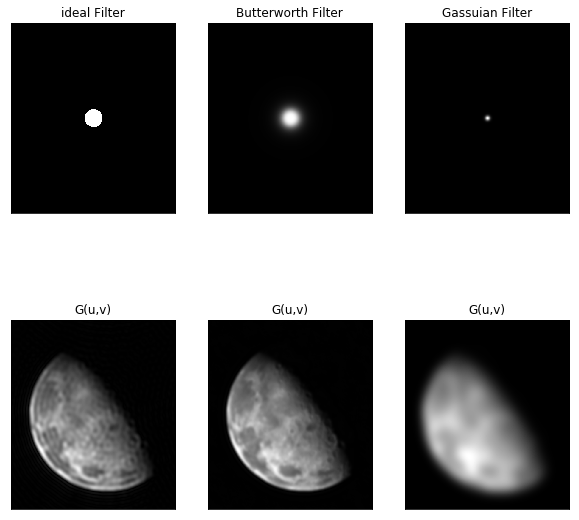

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import numpy, math
import scipy.misc
import scipy.fftpack as fftim
from scipy.misc.pilutil import Image

a = cv2.imread('images/moon.jpg',0)
c = np.fft.fft2(a)
d = np.fft.fftshift(c)


u = a.shape[0]
v = a.shape[1]
c1 = u/2
c2 = v/2
d0 = 30
#-----------------------------------
#ideal
array1 = np.zeros((u,v))
for i in range(1,u):
    for j in range(1,v):
        r1 = (i-c1)**2+(j-c2)**2
        r = math.sqrt(r1)
        if r <= d0:
            array1[i,j] = 1
            

convelution1 = array1 * d  
e1 = abs(fftim.ifft2(convelution1))

#----------------------------------
#Butterworth
array2 = np.zeros((u,v))
t2 = 2*2
for i in range(1,u):
    for j in range(1,v):
        r1 = (i-c1)**2+(j-c2)**2
        r = math.sqrt(r1)
        
        array2[i,j] = 1/(1 + (r/d0)**t2)

array2 = scipy.misc.toimage(array2)
convolution2 = d * array2 
e2 = abs(fftim.ifft2(convolution2))

#----------------------------------------
#Gassuian

array3 = np.zeros((u,v))
d0 = 20 
t1 = 2*4

for i in range(1,u):
    for j in range(1,v):
        r1 = (i-c1)**2+(j-c2)**2
        r = math.sqrt(r1)
        
        array3[i,j] = math.exp(-r**2/t1**2)

array3 = scipy.misc.toimage(array3)
convolution3 = d * array3
e3 = abs(fftim.ifft2(convolution3))
#-------------------------------------
fig = plt.figure(figsize=(10,10))
titles=['ideal Filter','Butterworth Filter','Gassuian Filter','G(u,v)','G(u,v)','G(u,v)']
images=[array1,array2,array3,e1,e2,e3]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i], cmap = 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()




#plt.subplot(121),plt.imshow(array1, cmap = 'gray')
#plt.title('ideal Filter'), plt.xticks([]), plt.yticks([])   
#plt.subplot(122),plt.imshow(e1, cmap = 'gray')
#plt.title('G(u,v)'), plt.xticks([]), plt.yticks([])
#plt.show()